## Importing Required Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Pre-processing

### Training Image Preprocessing

In [2]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
    'Train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
    verbose = True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'Valid',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
    verbose = True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

## Building Model

In [5]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

#### Building a Convolution Layer

In [7]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

C:\Users\daksh\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500, activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
#Output Layer

model.add(Dense(units=38, activation='softmax'))

#### Compiling Model

In [17]:
model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

#### Building the Model

We need to make sure the model is not going through overshooting, overfitting or underfitting.
To avoid Overshooting:
1. Choose small learning rate. Default is 0.001.
2. Increase number of neurons to prevent underfitting.
3. Add more convolution layer to extract more features from images. There may be a possibility that the model is unable to capture relevant feature or model is confused due to lack of features.

### Training Model

In [19]:
training_history = model.fit(x=training_dataset, validation_data = validation_dataset, epochs = 10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2420s 1s/step - accuracy: 0.4105 - loss: 2.0771 - val_accuracy: 0.8476 - val_loss: 0.4810
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2014s 917ms/step - accuracy: 0.8437 - loss: 0.5056 - val_accuracy: 0.9150 - val_loss: 0.2641
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2892s 1s/step - accuracy: 0.9065 - loss: 0.2901 - val_accuracy: 0.9256 - val_loss: 0.2290
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2995s 1s/step - accuracy: 0.9353 - loss: 0.1987 - val_accuracy: 0.9363 - val_loss: 0.1982
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2036s 914ms/step - accuracy: 0.9524 - loss: 0.1470 - val_accuracy: 0.9448 - val_loss: 0.1733
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1583s 721ms/step - accuracy: 0.9646 - loss: 0.1106 - val_accuracy: 0.9544 - val_loss: 0.1554
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1703s 775ms/step - accuracy: 0.9693 - loss: 0.0919 - val_accuracy: 0.9611 - val_loss: 0.1203
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2937s 1s/step - accura

## Model Evaluation

In [20]:
#Model Evaluation on Training set
training_loss, training_accuracy = model.evaluate(training_dataset)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 405s 184ms/step - accuracy: 0.9788 - loss: 0.0650


In [21]:
print(training_loss, training_accuracy)

0.06009207293391228 0.9806529879570007


In [22]:
#Model Evaluation on Validation Set
validation_loss, validation_accuracy = model.evaluate(validation_dataset)

550/550 ━━━━━━━━━━━━━━━━━━━━ 130s 237ms/step - accuracy: 0.9526 - loss: 0.1729


In [23]:
print(validation_loss, validation_accuracy)

0.16686084866523743 0.9533348679542542


## Saving the Model

In [24]:
model.save("trained_model.keras") #for less memory usage

In [25]:
training_history.history

{'accuracy': [0.6068283915519714,
  0.8651966452598572,
  0.9173198938369751,
  0.9419873356819153,
  0.9575503468513489,
  0.9659861922264099,
  0.971278190612793,
  0.9777935743331909,
  0.9799132347106934,
  0.9818621277809143],
 'loss': [1.3345305919647217,
  0.42796969413757324,
  0.25683656334877014,
  0.1791735142469406,
  0.1295449286699295,
  0.10498911887407303,
  0.0862734466791153,
  0.06897960603237152,
  0.06365619599819183,
  0.054967835545539856],
 'val_accuracy': [0.8475984334945679,
  0.9149783849716187,
  0.925563395023346,
  0.9363191723823547,
  0.9447985291481018,
  0.9544160962104797,
  0.9610744118690491,
  0.9568631649017334,
  0.9647166132926941,
  0.9533348679542542],
 'val_loss': [0.4809954762458801,
  0.26405465602874756,
  0.22904378175735474,
  0.19823233783245087,
  0.17327576875686646,
  0.15540610253810883,
  0.12025020271539688,
  0.13689735531806946,
  0.12000955641269684,
  0.16686087846755981]}

## Recording History in JSON

In [27]:
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

## Accuracy Visualization

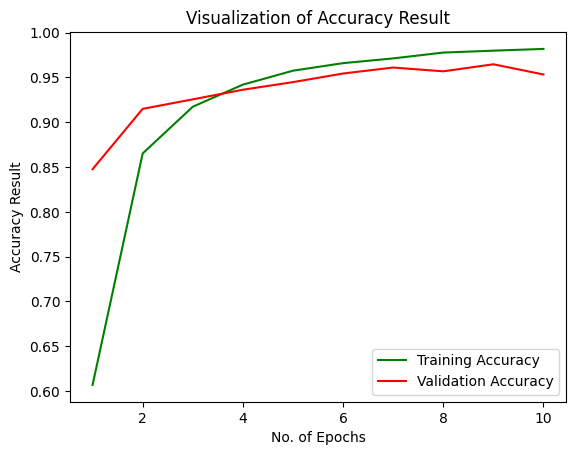

In [28]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history["accuracy"], color = "green", label = "Training Accuracy")
plt.plot(epochs, training_history.history["val_accuracy"], color = "red", label = "Validation Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()